In [16]:
!pip uninstall keras -y
!pip install keras


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.6 MB/s eta 0:00:00


In [17]:
!pip uninstall tensorflow -y
!pip install tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import re
import json
import requests
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from tensorflow.keras.callbacks import EarlyStopping
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) - {"not", "no", "fake", "real"}


# Load datasets
df_fake = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake.csv')
df_true = pd.read_csv('/content/drive/My Drive/Colab Notebooks/True.csv')

# Label datasets
df_true['status'] = 0  # 0 for true
df_fake['status'] = 1  # 1 for fake


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Combine datasets and shuffle
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)
df.drop(['subject', 'date'], axis=1, inplace=True)

# Define text cleaning function
text_cleaning = r"\b0\S*|\b[^A-Za-z0-9]+"

def preprocess_filter(text):
    text = re.sub(text_cleaning, " ", str(text.lower()).strip())
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply preprocessing
df['title'] = df['title'].apply(preprocess_filter)

# Tokenize and Pad
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['title'])
max_length = 40
X = pad_sequences(tokenizer.texts_to_sequences(df['title']), maxlen=max_length, padding='pre')
y = df['status'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer



# Save the tokenizer's word index (vocabulary)
with open('/content/drive/MyDrive/Colab Notebooks/tokenizer.json', 'w') as f:
    json.dump(tokenizer.word_index, f)


In [22]:
# Define LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=40, input_length=max_length),
    LSTM(100),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping for training efficiency
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Save the model to Google Drive
model.save('/content/drive/My Drive/Colab Notebooks/news_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8603 - loss: 0.3061 - val_accuracy: 0.9529 - val_loss: 0.1189
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9643 - loss: 0.0934 - val_accuracy: 0.9550 - val_loss: 0.1169
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9763 - loss: 0.0640 - val_accuracy: 0.9545 - val_loss: 0.1234
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9825 - loss: 0.0469 - val_accuracy: 0.9552 - val_loss: 0.1365
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9545 - val_loss: 0.1469
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9901 - loss: 0.0262 - val_accuracy: 0.9535 - val_loss: 0.1975
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9942 - loss: 0.0186 - val_accuracy: 0.9552 - val_loss: 0.2132
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4207
           1       0.95      0.96      0.95      4773

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

[[3980  227]
 [ 207 4566]]


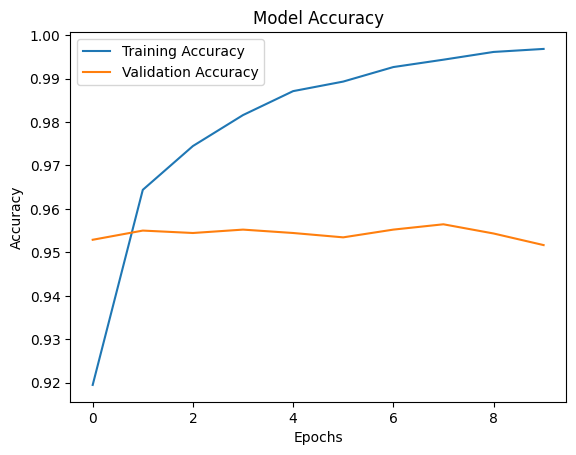

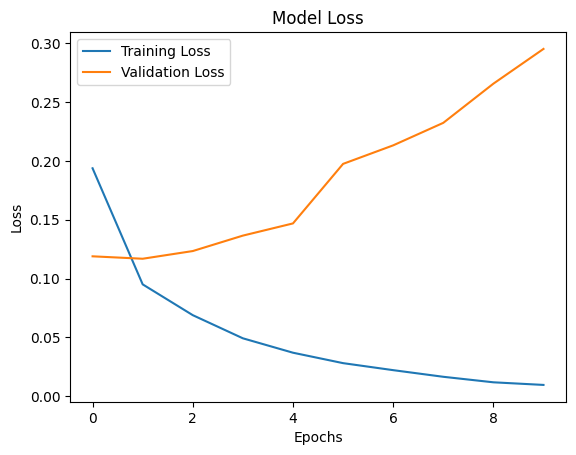

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Plot Training and Validation Graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
import requests
NEWS_API_KEY = '6c4a12629c064457946e7c14d7040671'
NEWS_API_URL = 'https://newsapi.org/v2/top-headlines?apiKey=' + NEWS_API_KEY

def fetch_news(keyword=""):
    url = f'https://newsapi.org/v2/top-headlines?apiKey={NEWS_API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        headlines = [article['title'] for article in articles]
        return headlines
    else:
        print(f"Error fetching news: {response.status_code}")
        return []


In [11]:
from tensorflow.keras.models import load_model

def predict_live_news():
    headlines = fetch_news()  # Fetch global news
    if not headlines:
        print("No news fetched.")
        return

    # Preprocess and tokenize
    processed_headlines = [preprocess_filter(headline) for headline in headlines]
    tokenized_headlines = tokenizer.texts_to_sequences(processed_headlines)
    padded_headlines = pad_sequences(tokenized_headlines, maxlen=max_length, padding='pre')

    # Load trained model
    model = load_model('/content/drive/MyDrive/Colab Notebooks/news_model.keras')

    # Predict
    predictions = model.predict(padded_headlines)
    for headline, prediction in zip(headlines, predictions):
        print(f"Headline: {headline}")
        print(f"Prediction: {'REAL' if prediction > 0.5 else 'FAKE'}\n")


In [4]:
#Manual Testing
def manual_test():
    print("Enter a headline to predict (or type 'exit' to quit):")
    while True:
        headline = input("Headline: ")
        if headline.lower() == 'exit':
            break

        # Preprocess and tokenize
        processed_headline = preprocess_filter(headline)
        tokenized_headline = tokenizer.texts_to_sequences([processed_headline])
        padded_headline = pad_sequences(tokenized_headline, maxlen=max_length, padding='pre')

        # Predict
        prediction = model.predict(padded_headline)
        print(f"Prediction: {'REAL' if prediction > 0.5 else 'FAKE'}\n")

In [12]:
print("Select an option:")
print("1: Predict on live news fetched from the News API")
print("2: Perform manual testing by entering your own headlines")
choice = input("Enter your choice (1 or 2): ")

if choice == '1':
    print("Fetching live news and predicting...")
    predict_live_news()
elif choice == '2':
    print("Manual testing mode. Enter headlines to predict:")
    manual_test()
else:
    print("Invalid choice. Please run the program again and select 1 or 2.")


Select an option:
1: Predict on live news fetched from the News API
2: Perform manual testing by entering your own headlines
Enter your choice (1 or 2): 1
Fetching live news and predicting...
Requesting URL: https://newsdata.io/api/1/latest?apikey=pub_594941af8aadeb7e10e167cf7a0914349a3c9&language=en
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Headline: Israeli troops reach deep into Lebanon since Oct. 1 invasion
Prediction: REAL

Headline: US confirms first case of more aggressive mpox strain
Prediction: REAL

Headline: Hospice of Santa Cruz County enters regional partnership ahead of coming reimbursement model changes
Prediction: REAL

Headline: Cowboys Deliver Update on CeeDee Lamb After New Injury
Prediction: FAKE

Headline: St. Peter's 69, UMBC 61
Prediction: FAKE

Headline: Spencer Martin notches 1st career shutout as Hurricanes put 4 past Senators
Prediction: REAL

Headline: Miss Universo 2024: Todo lo que debe saber de la final del certamen
Prediction: FAKE

Headline: Georgia election 

In [12]:
# Example usage: Uncomment the function you want to use

print("Select an option:")
print("1: Predict on live news fetched from the News API")
print("2: Perform manual testing by entering your own headlines")
choice = input("Enter your choice (1 or 2): ")

if choice == '1':
    print("Fetching live news and predicting...")
    predict_live_news()
elif choice == '2':
    print("Manual testing mode. Enter headlines to predict:")
    manual_test()
else:
    print("Invalid choice. Please run the program again and select 1 or 2.")

Select an option:
1: Predict on live news fetched from the News API
2: Perform manual testing by entering your own headlines
Enter your choice (1 or 2): 1
Fetching live news and predicting...
No news fetched.
